In [1]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np

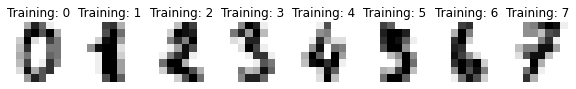

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=8, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
n_samples = len(digits.images)
print(f"A total of {n_samples} images are in this dataset")

A total of 1797 images are in this dataset


In [4]:
from sklearn.linear_model import ElasticNet
# flatten the images
data = digits.images.reshape((n_samples, -1))

clf = ElasticNet()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
# Predict the value of the digit on the test subset
np.random.choice(a=predicted, size=100)

array([6.54318124, 3.10191313, 6.28788486, 2.68253329, 4.49171927,
       5.77007473, 3.78095289, 7.04104784, 6.32433091, 5.95703847,
       1.43552512, 2.87026585, 4.92282612, 2.53087281, 6.40651234,
       1.85396968, 3.33949602, 2.18609851, 5.16564807, 5.85886867,
       4.64269363, 4.90360004, 6.4579428 , 2.00415636, 6.45082494,
       6.22822064, 3.17889039, 6.66417822, 5.61072406, 6.23015117,
       2.30632063, 4.14809496, 3.82687146, 6.30788565, 4.37105837,
       3.3585766 , 6.67432549, 5.21418462, 4.5621641 , 2.73974103,
       7.89911175, 6.55242036, 4.86293435, 6.18334693, 6.17587265,
       1.57121759, 6.32508943, 1.43643071, 4.56827961, 4.1039731 ,
       5.22923175, 2.21419907, 5.8651895 , 7.20943937, 6.1908864 ,
       7.89273248, 3.2746398 , 6.11493757, 6.10943198, 4.5621641 ,
       5.55501994, 3.86304225, 4.92282612, 1.56990415, 8.22640771,
       6.28788486, 4.4033226 , 4.78464432, 6.69370011, 7.7471172 ,
       7.67667805, 3.80075592, 6.68009006, 3.013349  , 2.46109

In [5]:
# This model is very naive, we need to convert regression results to discrete results.
predicted = np.rint(predicted)
np.random.choice(a=predicted, size=100)

array([2., 5., 4., 5., 5., 6., 6., 2., 6., 2., 6., 2., 2., 6., 5., 6., 7.,
       5., 3., 5., 2., 1., 7., 7., 4., 1., 5., 7., 4., 5., 5., 5., 2., 7.,
       4., 3., 7., 6., 3., 8., 1., 3., 5., 5., 5., 6., 2., 3., 7., 1., 9.,
       9., 7., 3., 6., 5., 5., 3., 5., 6., 4., 7., 4., 5., 4., 3., 6., 6.,
       4., 7., 6., 3., 5., 5., 5., 4., 5., 3., 3., 7., 6., 6., 5., 4., 3.,
       6., 5., 8., 6., 2., 6., 1., 6., 7., 6., 5., 2., 2., 2., 6.])

In [6]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier ElasticNet():
              precision    recall  f1-score   support

           0       0.86      0.07      0.13        88
           1       0.00      0.00      0.00        91
           2       0.36      0.40      0.38        86
           3       0.12      0.16      0.14        91
           4       0.14      0.23      0.17        92
           5       0.24      0.42      0.30        91
           6       0.15      0.24      0.19        91
           7       0.36      0.51      0.42        89
           8       0.26      0.12      0.17        88
           9       0.50      0.05      0.10        92

    accuracy                           0.22       899
   macro avg       0.30      0.22      0.20       899
weighted avg       0.30      0.22      0.20       899




Confusion matrix:
[[ 6 16 30 23 12  1  0  0  0  0]
 [ 0  0 12 29 38 11  1  0  0  0]
 [ 0 17 34 21 10  4  0  0  0  0]
 [ 0  0  7 15 30 25  9  5  0  0]
 [ 0  9  6 22 21 17 11  4  2  0]
 [ 1  0  1  0 10 38 24 16  1  0]
 [ 0  0  2  4 11 32 22 16  4  0]
 [ 0  0  0  0  2  6 27 45  9  0]
 [ 0  0  1  3 11 14 28 15 11  5]
 [ 0  0  1  7  6 13 20 24 16  5]]


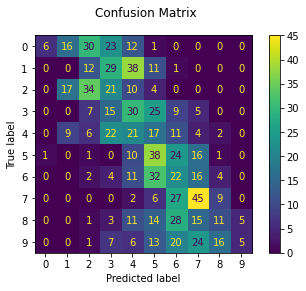

In [7]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()